1. **Load Images and Annotations:**
   - Imagine opening a photo album and reading the captions beneath each photo.
   - `image_folders` and `annotation_folders` are like different albums storing photos and their captions.
   - The code searches these albums to find photos (images) and their descriptions (annotations).

2. **Parse Annotations:**
   - Think of this like reading a treasure map to find hidden treasures.
   - The code reads the annotations (treasure map) to understand where objects (treasures) are in the photos and what they're called.
   - It finds special instructions (bounding boxes) on where to look for each object.

3. **Calculate Overlap Score:**
   - Imagine fitting two puzzle pieces together and seeing how well they match.
   - The code calculates a score (IOU score) to see how much two rectangles (like puzzle pieces) overlap.
   - This helps us know if the rectangles accurately represent the objects in the photos.

4. **Display Images:**
   - Picture watching a slideshow with extra details about each photo.
   - The code shows the photos with special rectangles drawn around objects.
   - It also tells us the names of these objects, such as "Cauliflower" or "French Fries."

5. **Show Detailed Information:**
   - This is like having a tour guide explain everything about the photos.
   - Below each photo, the code provides more details.
   - It tells us the names of objects, where their rectangles are (bounding box coordinates), and how well these rectangles match the objects (IOU score).

6. **Summary:**
   - It's like summarizing a story and highlighting important points.
   - The code helps us understand where objects are in photos, what they're called, and how accurately we've identified and located them using special rectangles.



In [47]:
import os
import random
import xml.etree.ElementTree as ET
import cv2
import pandas as pd
import matplotlib.pyplot as plt

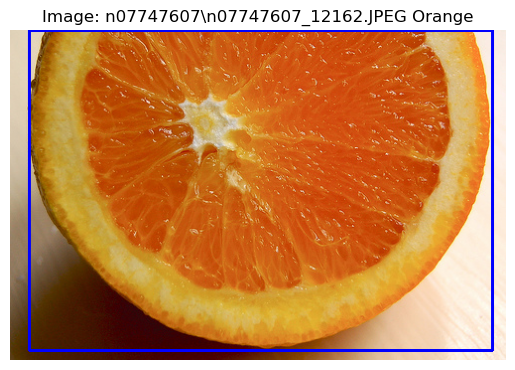

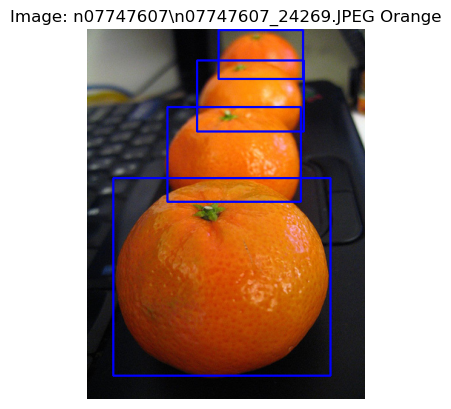

Image: n07747607\n07747607_24269.JPEG
Box1: (35, 201, 328, 468)
Box2: (108, 105, 288, 233)
Box1 Area: 78792
Box2 Area: 23349
Overlap Area: 5973
Overlap Percentage: 7.5807188547060615%
--------------------------------------------------
Image: n07747607\n07747607_24269.JPEG
Box1: (35, 201, 328, 468)
Box2: (148, 42, 292, 138)
Box1 Area: 78792
Box2 Area: 14065
Overlap Area: 0
Overlap Percentage: 0.0%
--------------------------------------------------
Image: n07747607\n07747607_24269.JPEG
Box1: (35, 201, 328, 468)
Box2: (177, 1, 291, 67)
Box1 Area: 78792
Box2 Area: 7705
Overlap Area: 0
Overlap Percentage: 0.0%
--------------------------------------------------
Image: n07747607\n07747607_24269.JPEG
Box1: (108, 105, 288, 233)
Box2: (148, 42, 292, 138)
Box1 Area: 23349
Box2 Area: 14065
Overlap Area: 4794
Overlap Percentage: 20.53192856225106%
--------------------------------------------------
Image: n07747607\n07747607_24269.JPEG
Box1: (108, 105, 288, 233)
Box2: (177, 1, 291, 67)
Box1 Area: 23

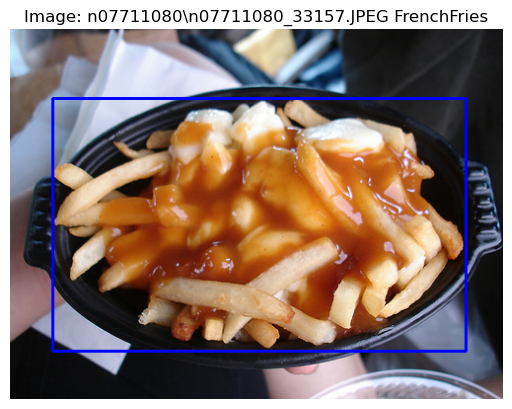

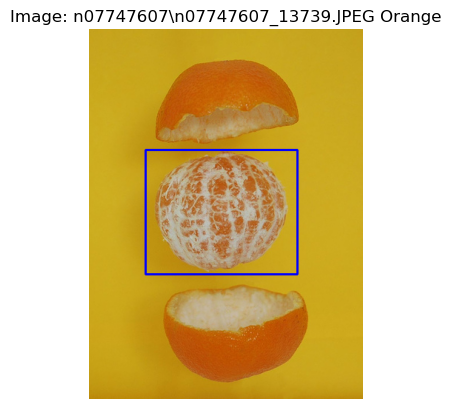

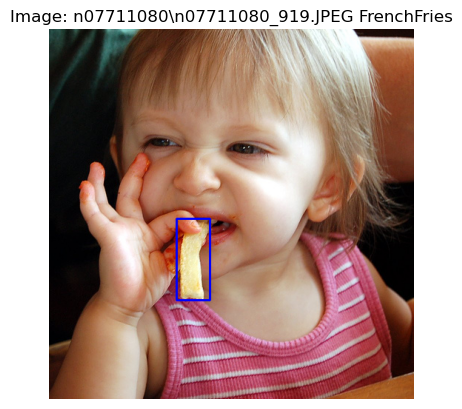

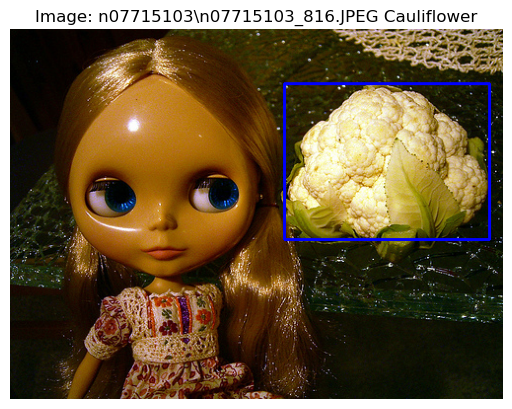

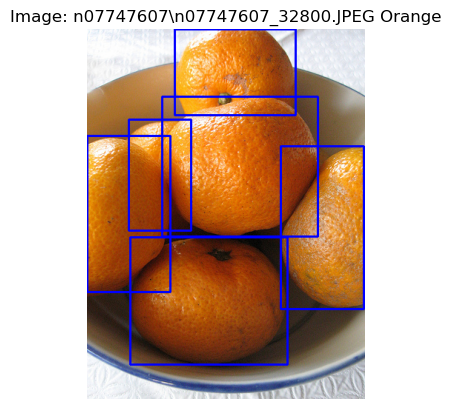

Image: n07747607\n07747607_32800.JPEG
Box1: (101, 91, 311, 280)
Box2: (118, 0, 281, 116)
Box1 Area: 40090
Box2 Area: 19188
Overlap Area: 4264
Overlap Percentage: 10.636068845098528%
--------------------------------------------------
Image: n07747607\n07747607_32800.JPEG
Box1: (101, 91, 311, 280)
Box2: (58, 281, 270, 453)
Box1 Area: 40090
Box2 Area: 36849
Overlap Area: 0
Overlap Percentage: 0.0%
--------------------------------------------------
Image: n07747607\n07747607_32800.JPEG
Box1: (101, 91, 311, 280)
Box2: (0, 144, 112, 355)
Box1 Area: 40090
Box2 Area: 23956
Overlap Area: 1644
Overlap Percentage: 4.10077326016463%
--------------------------------------------------
Image: n07747607\n07747607_32800.JPEG
Box1: (101, 91, 311, 280)
Box2: (261, 158, 373, 378)
Box1 Area: 40090
Box2 Area: 24973
Overlap Area: 6273
Overlap Percentage: 15.647293589423796%
--------------------------------------------------
Image: n07747607\n07747607_32800.JPEG
Box1: (101, 91, 311, 280)
Box2: (56, 122, 140, 

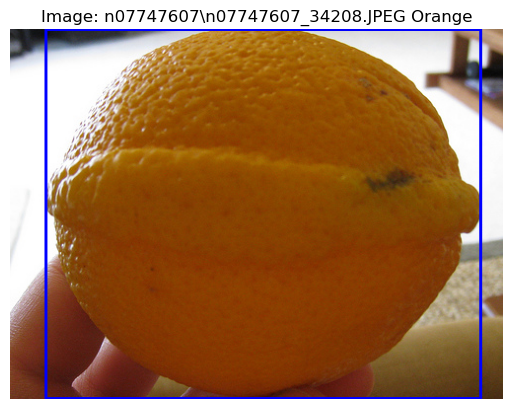

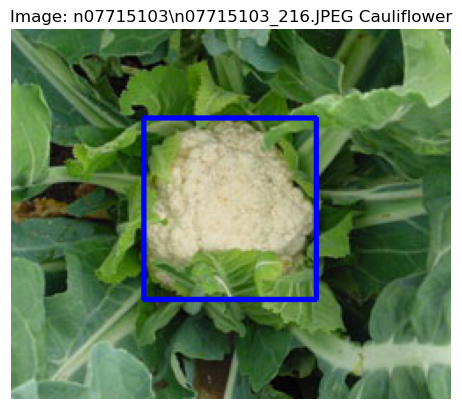

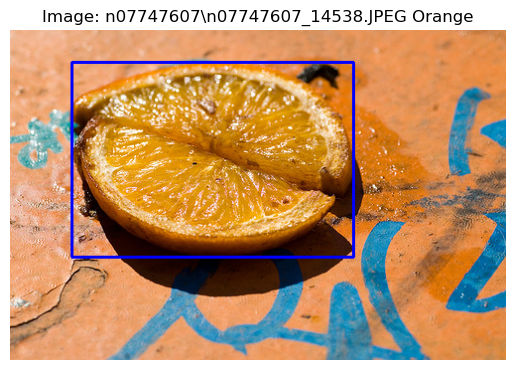

In [66]:
# Define the folders containing images and annotations
image_folders = ['Dataset/n07715103', 'Dataset/n07711080', 'Dataset/n07747607']
annotation_folders = ['n07715103', 'n07711080', 'n07747607']
label_dict={'Dataset/n07715103':'Cauliflower','Dataset/n07711080':'FrenchFries','Dataset/n07747607':'Orange'}

# Function to fetch random images with corresponding XML files
def fetch_random_images_with_xml(image_folders, annotation_folders, total_images):
    combined_data = []
    for image_folder, annotation_folder in zip(image_folders, annotation_folders):
        image_files = os.listdir(image_folder)
        for image_file in image_files:
            annotation_file = os.path.join(annotation_folder, image_file.replace('.JPEG', '.xml'))  # Corrected file extension
            if os.path.exists(annotation_file):  # Check if corresponding XML file exists
                combined_data.append((os.path.join(image_folder, image_file), annotation_file))
    
    random.shuffle(combined_data)  # Shuffle the combined list
    selected_data = combined_data[:total_images]  # Select the first total_images from the shuffled list
    selected_images, selected_annotations = zip(*selected_data)
    
    return selected_images, selected_annotations

def parse_xml(annotation_file):
    try:
        tree = ET.parse(annotation_file)
        root = tree.getroot()
        boxes = []
        for obj in root.findall('object'):
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            boxes.append((xmin, ymin, xmax, ymax))
        return boxes
    except FileNotFoundError:
        print(f"Error: File '{annotation_file}' not found.")
        return []

def draw_boxes(image, boxes):
    for box in boxes:
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)
    return image

def calculate_overlap(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    overlap_percentage = (interArea / float(boxAArea)) * 100
    return overlap_percentage, interArea

# Fetch 10 random images with corresponding XML files
total_images_to_fetch = 10
random_images, random_annotations = fetch_random_images_with_xml(image_folders, annotation_folders, total_images_to_fetch)

# Process each image, draw bounding boxes, and calculate overlap
for image_file, annotation_file in zip(random_images, random_annotations):
    image = cv2.imread(image_file)
    boxes = parse_xml(annotation_file)
    
    if len(boxes) > 0:
        image_with_boxes = draw_boxes(image.copy(), boxes)
        
        plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
        img=image_file.split('\\')
        
        label=label_dict[img[0]]
        plt.title(f"Image: {image_file.split('/')[-1]} {label}")
        plt.axis('off')
        plt.show()
        
        for i in range(len(boxes)):
            for j in range(i + 1, len(boxes)):
                overlap_percentage, overlap_area = calculate_overlap(boxes[i], boxes[j])
                
                print(f"Image: {image_file.split('/')[-1]}")
                print(f"Box1: {boxes[i]}")
                print(f"Box2: {boxes[j]}")
                print(f"Box1 Area: {(boxes[i][2] - boxes[i][0] + 1) * (boxes[i][3] - boxes[i][1] + 1)}")
                print(f"Box2 Area: {(boxes[j][2] - boxes[j][0] + 1) * (boxes[j][3] - boxes[j][1] + 1)}")
                print(f"Overlap Area: {overlap_area}")
                print(f"Overlap Percentage: {overlap_percentage}%")
                print("-" * 50)
    else:
        print(f"No boxes found in {annotation_file}")



